In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2 as cv
import numpy as np
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('Mean_ALLE.csv', delimiter=';')
df = df.drop('Tile', axis=1)

df

,Type,Hue,Saturation,Value,Type.1,Hue.1,Saturation.1,Value.1,Type.2,Hue.2,...,Saturation.4,Value.4,Type.5,Hue.5,Saturation.5,Value.5,Type.6,Hue.6,Saturation.6,Value.6
0,Medows,"41,5906","193,0161","151,1209",Forest,"45,1864","161,1531","66,1181",Fields,"26,3026",...,NaN,NaN,Castle,"28,5602","110,4772","139,9255",Table,22,"153,98",108
1,Medows,"43,3704","202,0811","151,0329",Forest,"43,6752","152,9081","61,6782",Fields,NaN,...,NaN,NaN,Castle,"23,6445","71,3569","118,3995",Table,26,115,109
2,Medows,"40,9778","210,926","144,1913",Forest,"44,4531","159,8208","63,2256",Fields,NaN,...,NaN,NaN,Castle,"35,829","83,8067","108,61",Table,NaN,NaN,NaN
3,Medows,"39,3559","219,9982","141,6698",Forest,"43,0294","167,6024","62,8192",Fields,NaN,...,NaN,NaN,Castle,NaN,NaN,NaN,Table,NaN,NaN,NaN
4,Medows,"42,513","207,7758","150,8302",Forest,"36,5725","158,8622","70,603",Fields,NaN,...,NaN,NaN,Castle,NaN,NaN,NaN,Table,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,NaN
1103,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,NaN
1104,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,NaN
1105,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,NaN


In [35]:
desired_columns = ['Type', 'Hue', 'Saturation', 'Value']
df_2 = pd.DataFrame(columns=desired_columns)

notna = df[f'Hue'].notna()
selected_values = df.loc[notna, 'Type':f'Value'].values.tolist()
vals_to_append = pd.DataFrame(selected_values, columns=desired_columns)
df_2 = pd.concat([df_2, vals_to_append], ignore_index=True)

for col in df.columns:
    splitted = col.split('.')
    
    if len(splitted) == 2:
        if splitted[0] == 'Type':
            notna = df[f'Hue.{splitted[1]}'].notna()
            selected_values = df.loc[notna, col:f'Value.{splitted[1]}'].values.tolist()
            vals_to_append = pd.DataFrame(selected_values, columns=desired_columns)
            df_2 = pd.concat([df_2, vals_to_append], ignore_index=True)

for col in desired_columns[1:]:
    df_2[col] = df_2[col].str.replace(',', '.').astype(float)

df_2 = df_2.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 568
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        568 non-null    object 
 1   Hue         568 non-null    float64
 2   Saturation  568 non-null    float64
 3   Value       568 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.2+ KB


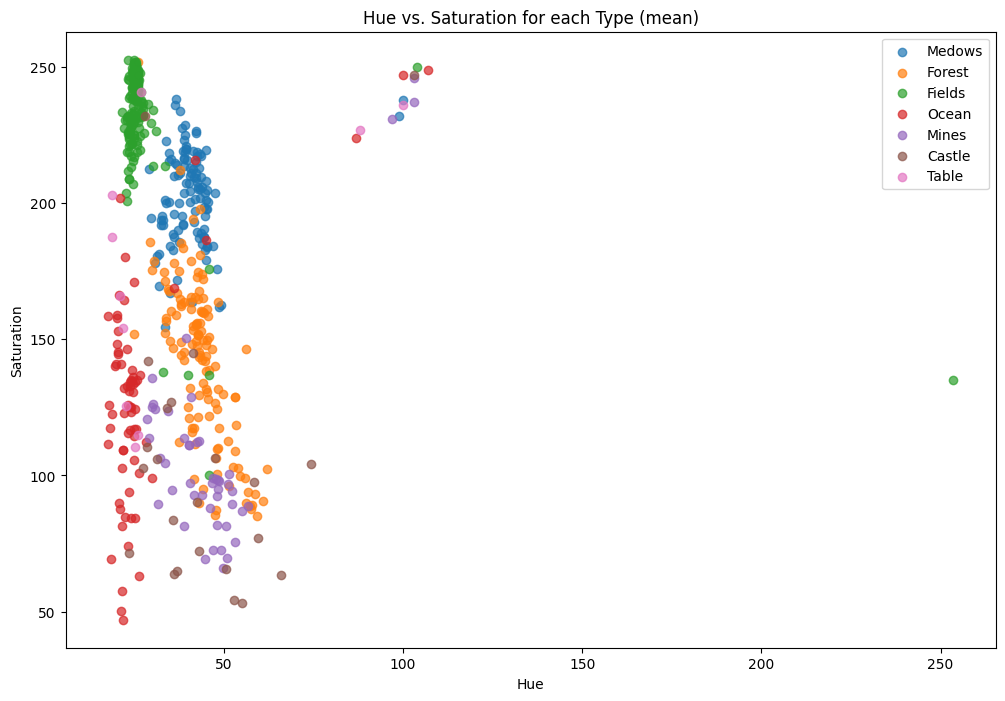

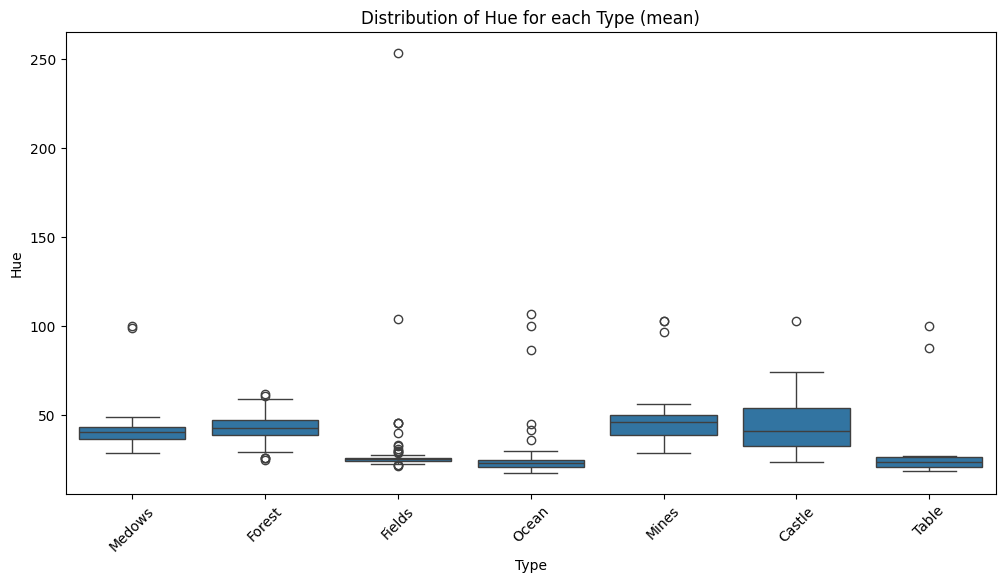

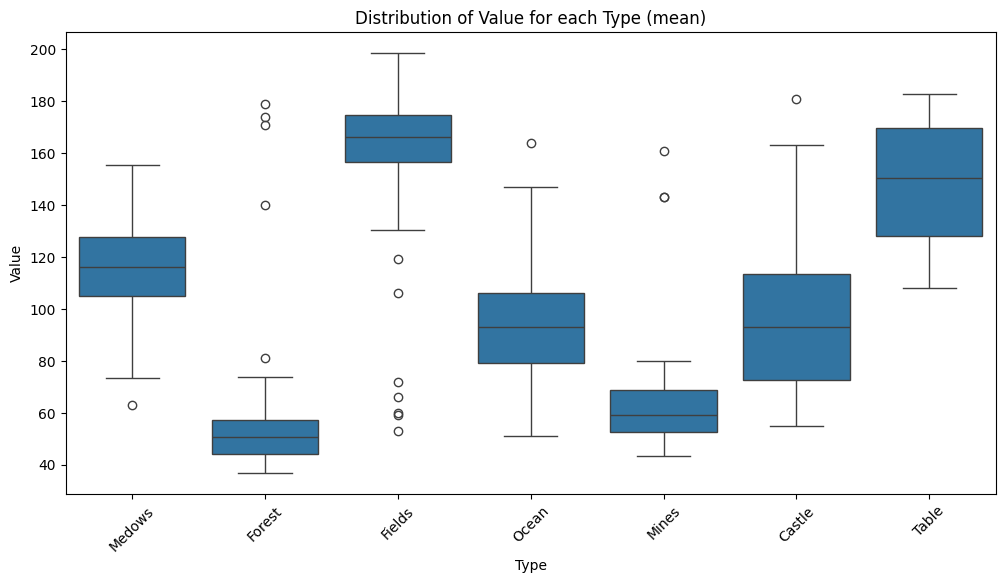

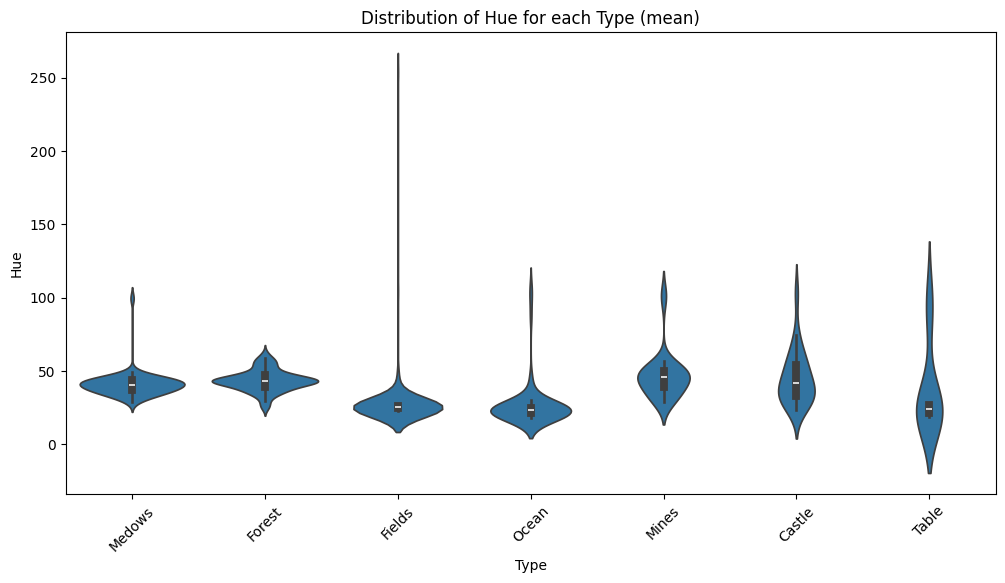

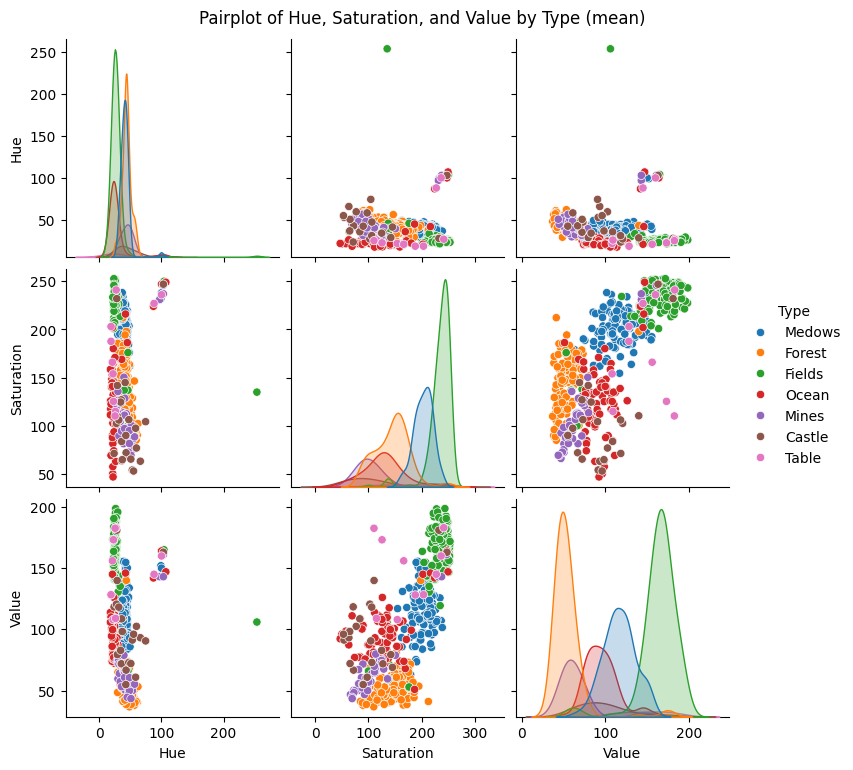

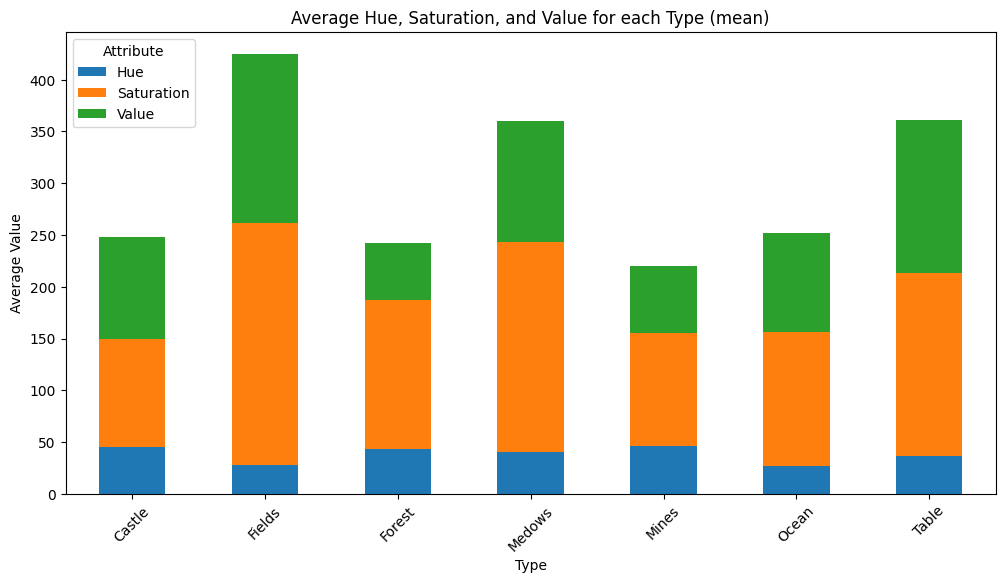

In [36]:
# 1. Scatter plot of Hue vs. Saturation for each Type
plt.figure(figsize=(12, 8))
for type in df_2['Type'].unique():
    subset = df_2[df_2['Type'] == type]
    plt.scatter(subset['Hue'], subset['Saturation'], label=type, alpha=0.7)
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue vs. Saturation for each Type (mean)')
plt.legend()
plt.show()

# 2. Box plot of Hue for each Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Hue', data=df_2)
plt.title('Distribution of Hue for each Type (mean)')
plt.xticks(rotation=45)
plt.show()

# 2. Box plot of Value for each Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Value', data=df_2)
plt.title('Distribution of Value for each Type (mean)')
plt.xticks(rotation=45)
plt.show()

# 3. Violin plot of Hue for each Type
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type', y='Hue', data=df_2)
plt.title('Distribution of Hue for each Type (mean)')
plt.xticks(rotation=45)
plt.show()

# 4. Pairplot for all numerical variables, colored by Type
sns.pairplot(df_2, hue='Type', vars=['Hue', 'Saturation', 'Value'])
plt.suptitle('Pairplot of Hue, Saturation, and Value by Type (mean)', y=1.02)
plt.show()

# 5. Stacked bar chart of average Hue, Saturation, and Value for each Type
avg_data = df_2.groupby('Type')[['Hue', 'Saturation', 'Value']].mean()
avg_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Hue, Saturation, and Value for each Type (mean)')
plt.xlabel('Type')
plt.ylabel('Average Value')
plt.legend(title='Attribute')
plt.xticks(rotation=45)
plt.show()

In [37]:
df = df_2

In [38]:
X = df.drop('Type', axis=1)
y = df['Type'].astype('category')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [40]:
k = 22
knn = KNeighborsClassifier(k)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [42]:
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
pd.DataFrame(report).transpose()

{'Castle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'Fields': {'precision': 0.9736842105263158, 'recall': 0.9024390243902439, 'f1-score': 0.9367088607594937, 'support': 41.0}, 'Forest': {'precision': 0.8947368421052632, 'recall': 0.9444444444444444, 'f1-score': 0.918918918918919, 'support': 36.0}, 'Medows': {'precision': 0.7333333333333333, 'recall': 0.9166666666666666, 'f1-score': 0.8148148148148148, 'support': 24.0}, 'Mines': {'precision': 0.6875, 'recall': 0.6875, 'f1-score': 0.6875, 'support': 16.0}, 'Ocean': {'precision': 0.7, 'recall': 0.9333333333333333, 'f1-score': 0.8, 'support': 15.0}, 'Table': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0}, 'accuracy': 0.8309859154929577, 'macro avg': {'precision': 0.5698934837092732, 'recall': 0.6263404955478126, 'f1-score': 0.5939917992133182, 'support': 142.0}, 'weighted avg': {'precision': 0.7833209785025944, 'recall': 0.8309859154929577, 'f1-score': 0.8031105628716612, 'support': 142.0}}


/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,precision,recall,f1-score,support
Castle,0.000000,0.000000,0.000000,6.000000
Fields,0.973684,0.902439,0.936709,41.000000
Forest,0.894737,0.944444,0.918919,36.000000
Medows,0.733333,0.916667,0.814815,24.000000
Mines,0.687500,0.687500,0.687500,16.000000
Ocean,0.700000,0.933333,0.800000,15.000000
Table,0.000000,0.000000,0.000000,4.000000
accuracy,0.830986,0.830986,0.830986,0.830986
macro avg,0.569893,0.626340,0.593992,142.000000
weighted avg,0.783321,0.830986,0.803111,142.000000


In [43]:
gbc = GradientBoostingClassifier()

In [44]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
y_pred = gbc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
Castle,0.500000,0.500000,0.500000,6.000000
Fields,0.973684,0.902439,0.936709,41.000000
Forest,0.842105,0.888889,0.864865,36.000000
Medows,0.857143,1.000000,0.923077,24.000000
Mines,0.833333,0.625000,0.714286,16.000000
Ocean,0.789474,1.000000,0.882353,15.000000
Table,1.000000,0.250000,0.400000,4.000000
accuracy,0.859155,0.859155,0.859155,0.859155
macro avg,0.827963,0.738047,0.745898,142.000000
weighted avg,0.866082,0.859155,0.851816,142.000000


In [46]:
def get_tiles(image):
    tiles = []
    for y in range(5):
        tiles.append([])
        for x in range(5):
            tiles[-1].append(image[y * 100 : (y + 1) * 100, x * 100 : (x + 1) * 100])
    return tiles

In [132]:
def get_terrain(tile):
    hsv_tile = cv.cvtColor(tile, cv.COLOR_BGR2HSV)
    hue, saturation, value = np.median(
        hsv_tile, axis=(0, 1)
    )  # Consider using median instead of mean

    hue = hue.flatten()
    saturation = saturation.flatten()
    value = value.flatten()

    df_tile = pd.DataFrame({ 'Hue': hue, 'Saturation': saturation, 'Value': value })

    print(f"H: {hue}, S: {saturation}, V: {value}")
    return knn.predict(df_tile)

    # for tile_type in df['Type'].unique():
    #     described = df[df['Type'] == tile_type].describe(percentiles=[0.2, 0.5, 0.8]).to_dict()


    #     if described['Hue']['20%'] < hue < described['Hue']['80%'] and described['Saturation']['20%'] < saturation < described['Saturation']['80%'] and described['Value']['20%'] < value < described['Value']['80%']:
    #         return tile_type
        
    # return 'Unknown'

In [133]:
def dostuff():
    image_path = "./dataset/1.jpg"
    if not os.path.isfile(image_path):
        print("Image not found")
        return
    image = cv.imread(image_path)
    tiles = get_tiles(image)
    print(len(tiles))
    for y, row in enumerate(tiles):
        for x, tile in enumerate(row):
            print(f"Tile ({x}, {y}):")
            print(get_terrain(tile))
            print("=====")

In [134]:
dostuff()

5
Tile (0, 0):
H: [43.], S: [215.], V: [156.]
['Fields']
=====
Tile (1, 0):
H: [105.], S: [254.], V: [184.]
['Fields']
=====
Tile (2, 0):
H: [46.], S: [165.], V: [62.]
['Forest']
=====
Tile (3, 0):
H: [42.], S: [155.], V: [59.]
['Forest']
=====
Tile (4, 0):
H: [45.], S: [163.], V: [60.]
['Forest']
=====
Tile (0, 1):
H: [44.], S: [212.], V: [156.]
['Fields']
=====
Tile (1, 1):
H: [46.], S: [165.], V: [58.]
['Forest']
=====
Tile (2, 1):
H: [43.], S: [171.], V: [59.]
['Forest']
=====
Tile (3, 1):
H: [36.], S: [167.], V: [64.]
['Forest']
=====
Tile (4, 1):
H: [42.], S: [216.], V: [151.]
['Fields']
=====
Tile (0, 2):
H: [41.], S: [209.], V: [154.]
['Fields']
=====
Tile (1, 2):
H: [23.], S: [127.], V: [114.]
['Ocean']
=====
Tile (2, 2):
H: [29.], S: [96.], V: [141.]
['Ocean']
=====
Tile (3, 2):
H: [43.], S: [178.], V: [58.]
['Forest']
=====
Tile (4, 2):
H: [40.], S: [224.], V: [147.]
['Fields']
=====
Tile (0, 3):
H: [43.], S: [224.], V: [151.]
['Fields']
=====
Tile (1, 3):
H: [23.], S: [132.